#### Dataset

In [2]:
# Dataset: Mall_Customers.csv
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

In [7]:
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Separate the input data

In [10]:
x = df.iloc[:,[3,4]]

In [11]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Visualize 

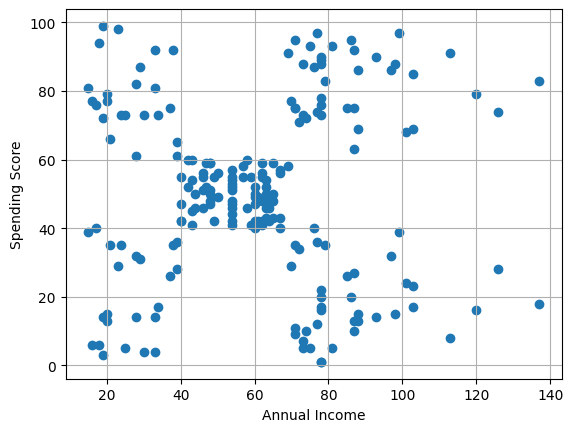

In [16]:
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])

#### Elbow method to find the optimal value of k

In [18]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=3, random_state=0)

In [22]:
km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [24]:
# Sum squared error
km.inertia_

106348.37306211118

In [27]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x)
    sse.append(km.inertia_)

In [28]:
sse

[269981.28,
 185917.14253928524,
 106348.37306211119,
 73679.78903948834,
 44448.4554479337,
 38858.9599751439,
 31969.42655023548,
 29858.483597603947,
 22209.851608025547,
 20786.936692059164,
 18612.22286800968,
 17083.672501709316,
 16511.947370563892,
 15599.14833144512,
 14697.298899626936]

#### Visualize the elbow

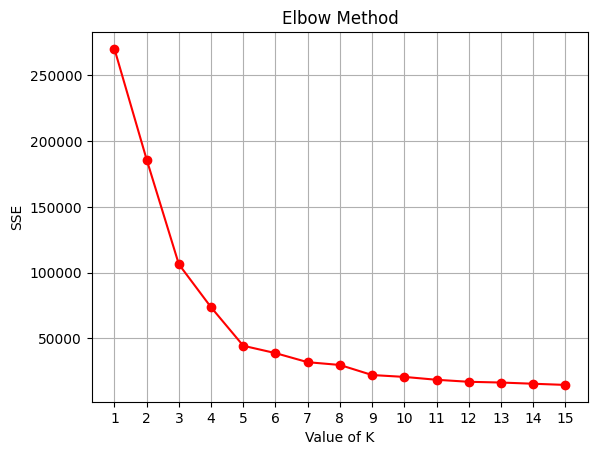

In [31]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.grid()
plt.plot(range(1,16), sse, marker='o', color='r')

In [34]:
km = KMeans(random_state=0,n_clusters=5, n_init='auto')

In [35]:
y = km.fit_predict(x)

In [36]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

#### Visualize the clusters

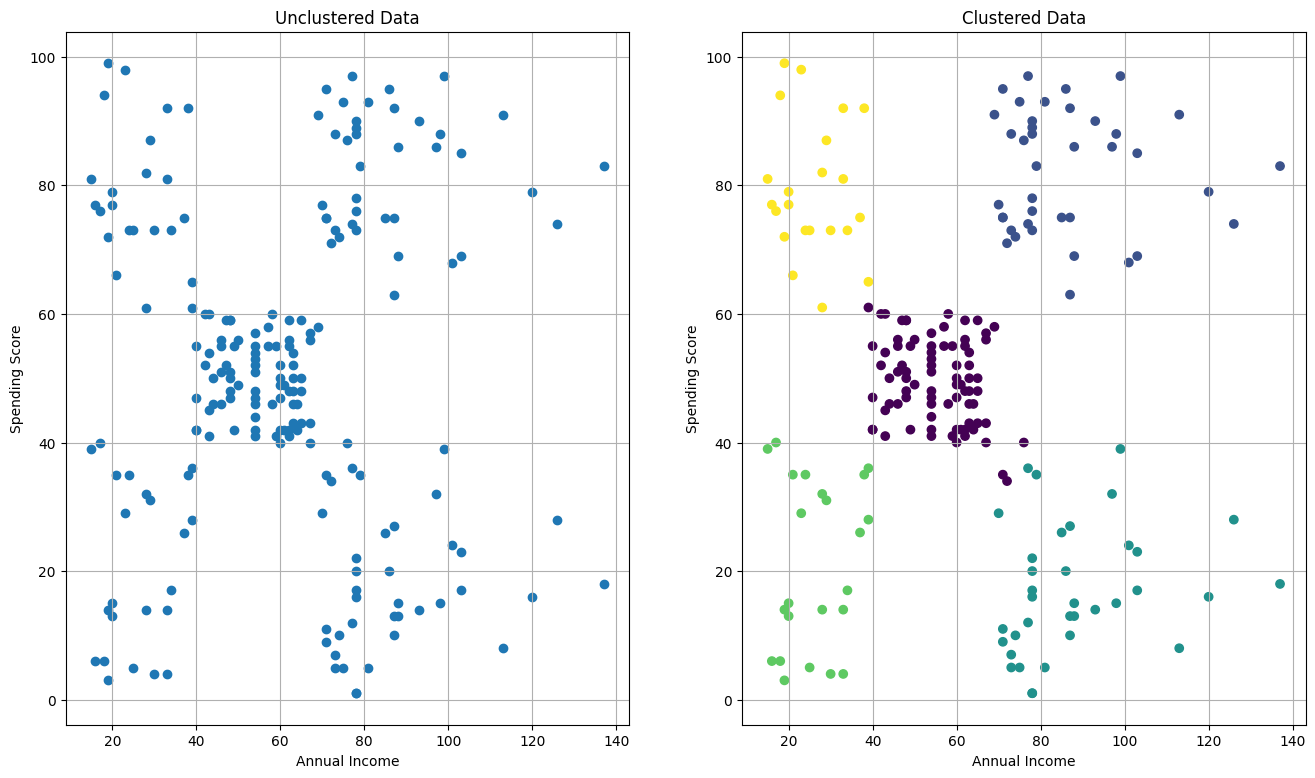

In [40]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])
plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1], c = y)

In [41]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [42]:
cents = km.cluster_centers_

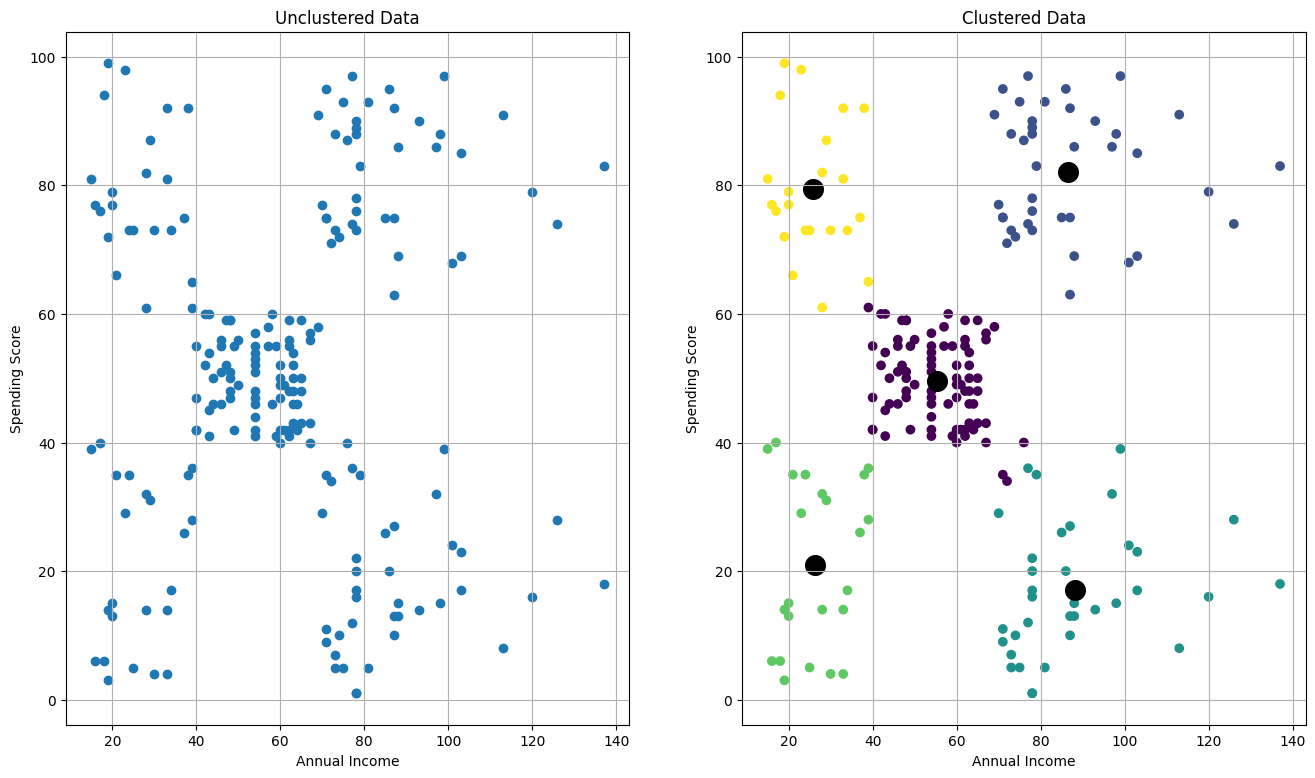

In [44]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])
plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1], c = y)
plt.scatter(cents[:,0], cents[:,1], s=200, color='k')

#### Extract the clusters

In [48]:
zero = df[y==0]
one = df[y==1]
two = df[y==2]
three = df[y==3]
four = df[y==4]

In [50]:
print('Cluster-0:',len(zero))
print('Cluster-1:',len(one))
print('Cluster-2:',len(two))
print('Cluster-3:',len(three))
print('Cluster-4:',len(four))

Cluster-0: 81
Cluster-1: 39
Cluster-2: 35
Cluster-3: 23
Cluster-4: 22


In [51]:
one.to_csv('one.csv', index=False)

#### Prediction

In [53]:
new1 = [[34,67]]
new2 = [[102,47]]
new3 = [[89,93]]

In [56]:
km.predict(new1)[0], km.predict(new2)[0], km.predict(new3)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


(4, 2, 1)